In [1]:
import tensorly as tl
import numpy as np

Using numpy backend.


In [2]:

import numpy as np
np.random.seed(0)
%matplotlib inline
import matplotlib.pyplot as plt
from nilearn import image
import copy
from nilearn import plotting
from nilearn.masking import compute_background_mask
from nilearn.masking import compute_epi_mask
from collections import OrderedDict
import pandas as pd
from scipy import stats
from nilearn.image import math_img

In [3]:
def get_mask(data, observed_ratio):
    
    if len(data.shape) == 3:
        mask_indices = (np.random.rand(data.shape[0],data.shape[1],data.shape[2]) < observed_ratio).astype('int') 
    elif len(data.shape) == 4:
        mask_indices = (np.random.rand(data.shape[0],data.shape[1],data.shape[2], data.shape[3]) < observed_ratio).astype('int') 
    elif len(data.shape) == 2:
        mask_indices = (np.random.rand(data.shape[0],data.shape[1]) < observed_ratio).astype('int') 
    
    return mask_indices

In [4]:
import nibabel as nib
import copy

In [5]:
def read_image_abs_path(path):
    img = nib.load(path)
    return img

In [6]:
subject_scan_path = "/work/pl/sch/analysis/data/COBRE001/swaAMAYER+cobre01_63001+M87100944+20110309at135133+RSTpre_V01_R01+CM.nii"
print ("Subject Path: " + str(subject_scan_path))
x_true_org = read_image_abs_path(subject_scan_path)

Subject Path: /work/pl/sch/analysis/data/COBRE001/swaAMAYER+cobre01_63001+M87100944+20110309at135133+RSTpre_V01_R01+CM.nii


In [7]:
x_true_img = np.array(x_true_org.get_data())

In [8]:
from nilearn.masking import compute_background_mask
from nilearn.masking import compute_epi_mask
from nilearn import plotting

In [9]:
mask_img = compute_epi_mask(x_true_org)
mask_img_data = np.array(mask_img.get_data())

observed_ratio = 0.95
missing_ratio = 1 - observed_ratio

mask_indices = get_mask(x_true_img, observed_ratio)
epi_mask = copy.deepcopy(mask_img_data)
    
mask_indices[epi_mask==0] = 1



#x_true_img = np.array(x_true_org.get_data())

norm_ground_truth = np.linalg.norm(x_true_img)
x_true_img = x_true_img * (1./norm_ground_truth)

In [10]:
norm_ground_truth = np.linalg.norm(x_true_img)
x_true_img = x_true_img * (1./norm_ground_truth)

#mask_indices = (np.random.rand(x_true_img.shape[0],x_true_img.shape[1],x_true_img.shape[2], x_true_img.shape[3]) < observed_ratio).astype('int') 
ten_ones = np.ones_like(mask_indices)
x_train = copy.deepcopy(x_true_img)
x_train[mask_indices==0] = 0.0
#x_train[mask_indices == 0] = np.mean(x_train[mask_indices == 1])
#x_train[mask_indices == 0] = np.mean(x_train[mask_indices == 1])

x_init = copy.deepcopy(x_train)

In [11]:
def reconstruct_image_affine(img_ref, x_hat):
    result = nib.Nifti1Image(x_hat, img_ref.affine)
    return result

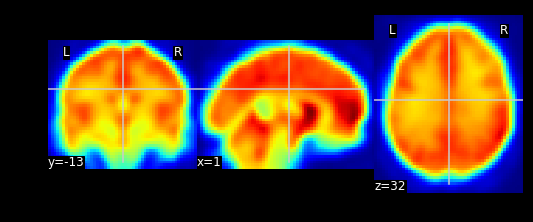

In [12]:
x_org = reconstruct_image_affine(x_true_org, x_true_img)
x_org_img = image.index_img(x_org,1)
#x_true_org_img = image.index_img(x_true_org,1)
org_image = plotting.plot_epi(x_org_img, bg_img=None,black_bg=True, cmap='jet', cut_coords=None)

In [13]:
from nilearn import image

In [14]:
x_miss_img = reconstruct_image_affine(x_true_org, x_train)

In [15]:
x_miss = image.index_img(x_miss_img,1)

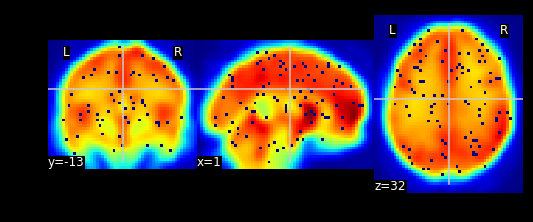

In [16]:
x_miss_image = plotting.plot_epi(x_miss, bg_img=None,black_bg=True, cmap='jet', cut_coords=[1, -13, 32]) 

In [17]:
from tensorly.decomposition import robust_pca

In [ ]:
low_rank_part, sparse_part = robust_pca(x_train, reg_E=0.04, learning_rate=1.2, n_iter_max=20)